# XGBoost classification model of HIV suivival status

## 1. 环境准备

### 1.1 安装python包

执行命令安装以下python包：

In [183]:
pip install xgboost scikit-learn pandas matplotlib

Looking in indexes: http://mirrors.tools.huawei.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


### 1.2 导入python包

In [184]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

## 2. 数据处理

原始数据已经过部分处理，数据集见dataset目录下的Datas.xlsx文件

In [185]:
# 特征列
feature_columns = ["gender", "onset_age", "onset_age_class", "education_level", "occupation", "marital_status", 
                   "venereal_history", "infection_pathway", "last_CD4_result", "treat_status"]
# 标签列
label_columns = ["survival_status"]

# 特征数据
data = pd.read_excel("dataset/Datas.xlsx", sheet_name="Sheet1", usecols=feature_columns)
# 标签数据
target = pd.read_excel("dataset/Datas.xlsx", sheet_name="Sheet1", usecols=label_columns)

查看一下数据：

In [186]:
data.head()

,gender,onset_age,onset_age_class,education_level,occupation,marital_status,venereal_history,infection_pathway,last_CD4_result,treat_status
0,1,52,2,1,0,1,0,1,1,1
1,0,39,1,2,0,2,0,0,3,1
2,0,51,2,2,1,1,0,1,3,1
3,0,34,1,3,1,2,0,0,2,1
4,0,23,1,2,2,0,0,0,3,0


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             676 non-null    int64
 1   onset_age          676 non-null    int64
 2   onset_age_class    676 non-null    int64
 3   education_level    676 non-null    int64
 4   occupation         676 non-null    int64
 5   marital_status     676 non-null    int64
 6   venereal_history   676 non-null    int64
 7   infection_pathway  676 non-null    int64
 8   last_CD4_result    676 non-null    int64
 9   treat_status       676 non-null    int64
dtypes: int64(10)
memory usage: 52.9 KB


In [188]:
data.describe()

,gender,onset_age,onset_age_class,education_level,occupation,marital_status,venereal_history,infection_pathway,last_CD4_result,treat_status
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,0.217456,48.748521,1.942308,1.868343,1.013314,1.124260,0.392012,0.779586,2.390533,0.886095
std,0.412821,17.220541,0.804386,1.113741,0.727125,0.685903,0.761205,0.623204,0.751196,0.317931
min,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,35.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
50%,0.000000,48.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000
75%,0.000000,64.000000,3.000000,2.000000,1.000000,2.000000,0.000000,1.000000,3.000000,1.000000
max,1.000000,91.000000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000


特征数据图表：

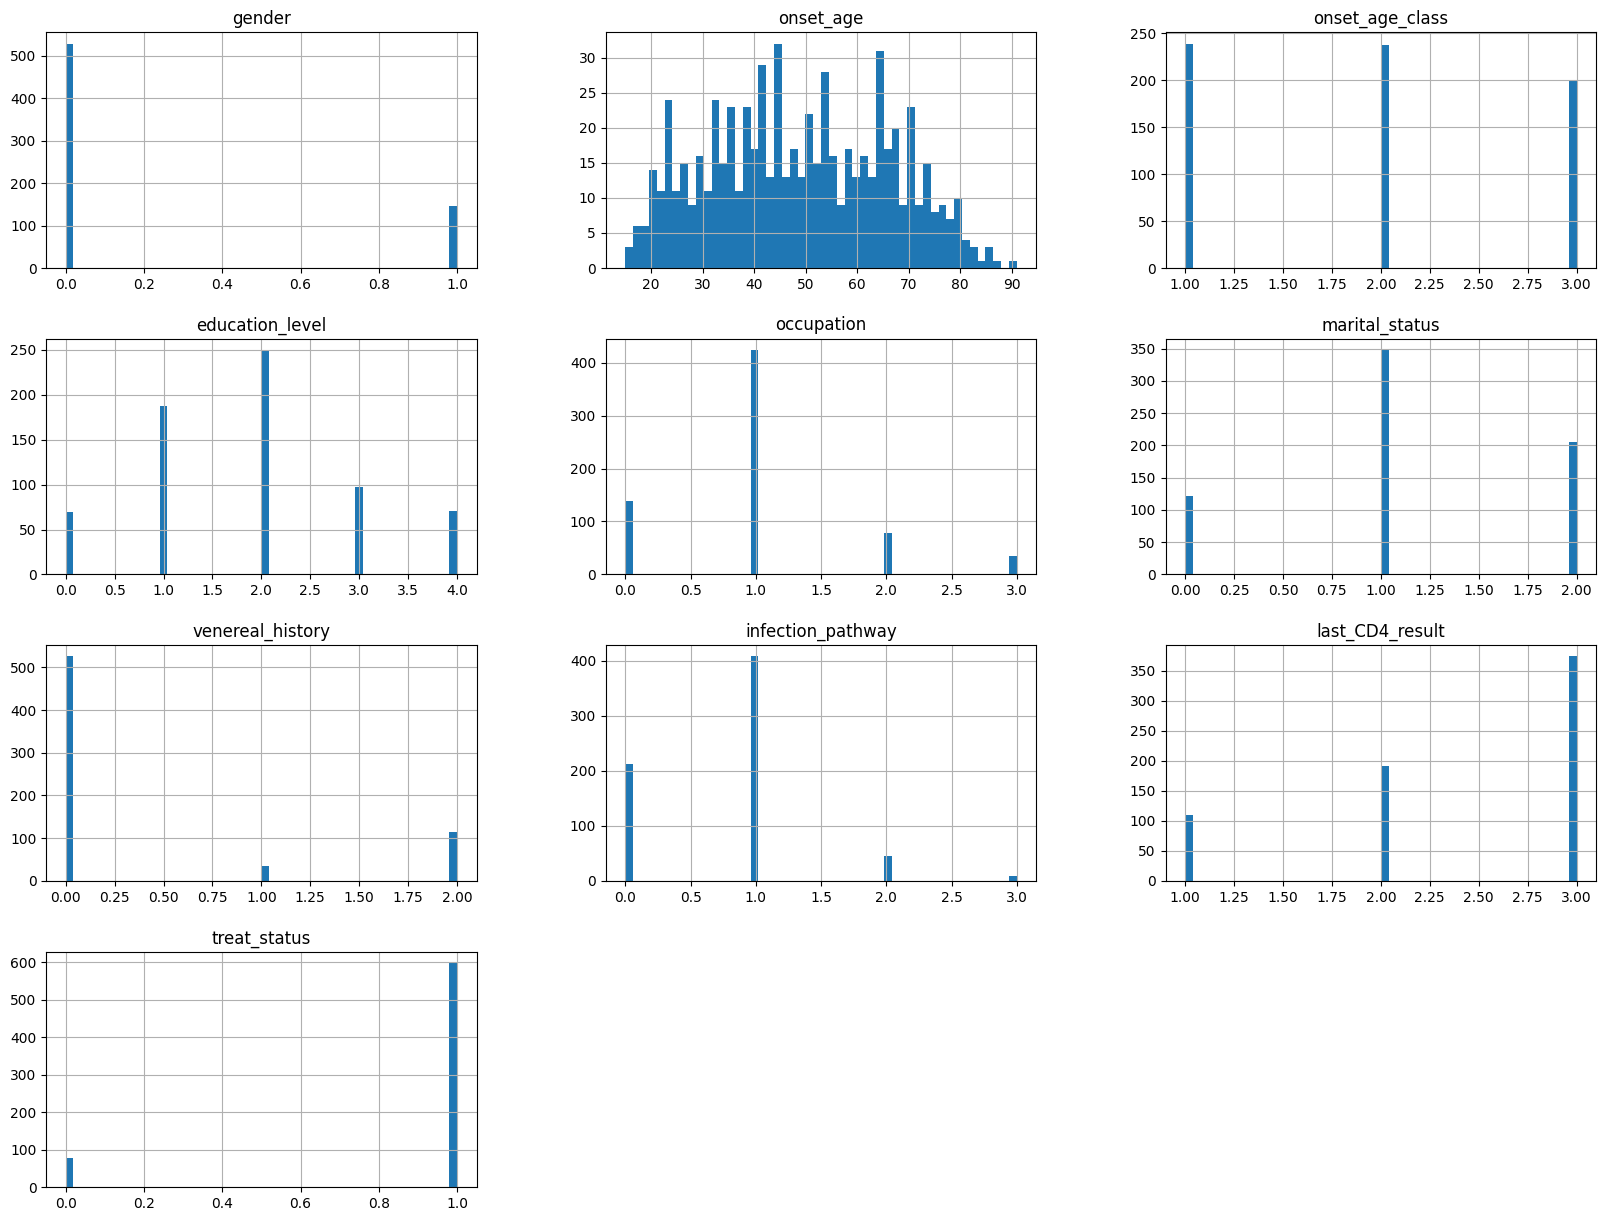

In [189]:
%matplotlib inline
data.hist(bins=50, figsize=(20, 15))
plt.show()

标签数据图表：

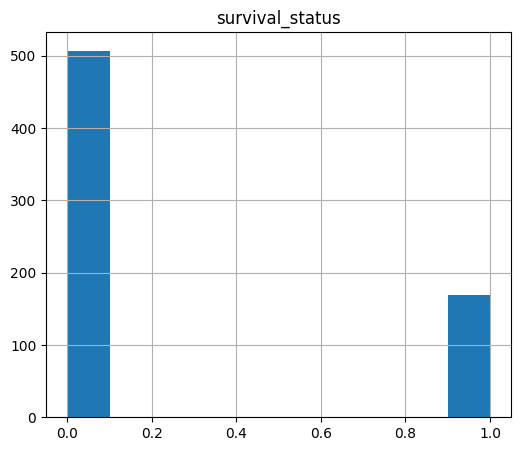

In [190]:
%matplotlib inline
target.hist(figsize=(6, 5))
plt.show()

## 3.模型建立

### 3.1 训练集与测试集划分

In [191]:
# test_size=0.3表示训练集和测试集划分比例为7:3
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=2024)
dTrain = xgb.DMatrix(X_train, y_train)
dTest = xgb.DMatrix(X_test, y_test)

### 3.2 初始模型建立

设置模型基础参数，其余参数暂且默认

In [192]:
params = {
    'booster': 'gbtree', # 树模型
    'objective': 'binary:logistic', # 目标函数，二分类
    'eval_metric': 'auc', # 评估指标
}
# 设置运行时监控指标
watchlist = [(dTrain, 'train')]

使用XGBoost的原生接口进行模型训练：

In [193]:
model = xgb.train(params, dTrain, num_boost_round=50, evals=watchlist)

[0]	train-auc:0.92850
[1]	train-auc:0.94546
[2]	train-auc:0.95016
[3]	train-auc:0.95750
[4]	train-auc:0.96398
[5]	train-auc:0.96719
[6]	train-auc:0.96948
[7]	train-auc:0.97302
[8]	train-auc:0.97476
[9]	train-auc:0.97672
[10]	train-auc:0.97756
[11]	train-auc:0.97894
[12]	train-auc:0.98028
[13]	train-auc:0.98199
[14]	train-auc:0.98251
[15]	train-auc:0.98416
[16]	train-auc:0.98481
[17]	train-auc:0.98547
[18]	train-auc:0.98637
[19]	train-auc:0.98756
[20]	train-auc:0.98825
[21]	train-auc:0.98897
[22]	train-auc:0.98950
[23]	train-auc:0.99002
[24]	train-auc:0.99040
[25]	train-auc:0.99090
[26]	train-auc:0.99157
[27]	train-auc:0.99167
[28]	train-auc:0.99203
[29]	train-auc:0.99260
[30]	train-auc:0.99326
[31]	train-auc:0.99349
[32]	train-auc:0.99378
[33]	train-auc:0.99376
[34]	train-auc:0.99403
[35]	train-auc:0.99463
[36]	train-auc:0.99520
[37]	train-auc:0.99534
[38]	train-auc:0.99573
[39]	train-auc:0.99580
[40]	train-auc:0.99589
[41]	train-auc:0.99613
[42]	train-auc:0.99635
[43]	train-auc:0.9965

模型建立后，查看一下模型特征值的相关性：

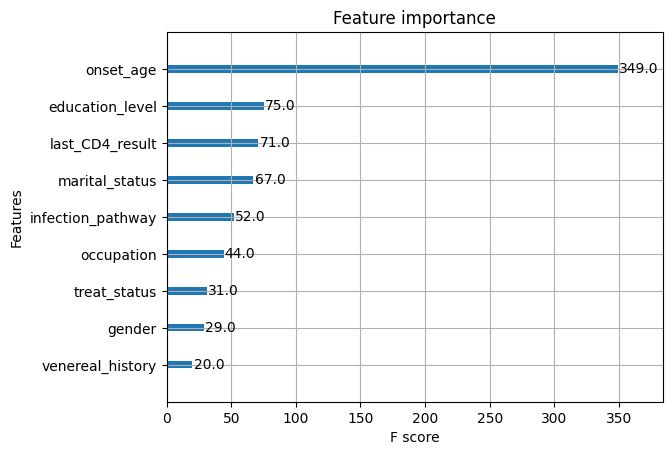

In [194]:
xgb.plot_importance(model)
plt.show()

可以看到发病年龄对模型的相关性远高于其他特征，有过拟合的风险

### 3.3 初始模型预测

In [195]:
# 模型预测，输出为概率
y_predict_prob = model.predict(dTest)
# 设置阈值为0.5
y_predict = (y_predict_prob >= 0.5) * 1

### 3.4 初始模型评估

In [196]:
# AUC值
roc_auc = roc_auc_score(y_test, y_predict)
# 准确率
accuracy = accuracy_score(y_test, y_predict)
# 精确率
precision = precision_score(y_test, y_predict)
# 召回率
recall = recall_score(y_test, y_predict)
# F1值，准确率和召回率的调和平均数
f1 = f1_score(y_test, y_predict)
# 混淆矩阵
confusion_mat = confusion_matrix(y_test, y_predict)

print(f'auc: {roc_auc}')
print(f'accuracy score: {accuracy}')
print(f'precision score: {precision}')
print(f'recall score: {recall}')
print(f'f1 score: {f1}')
print(f'confusion matrix: {confusion_mat}')

auc: 0.7250386996904026
accuracy score: 0.7931034482758621
precision score: 0.5882352941176471
recall score: 0.5882352941176471
f1 score: 0.5882352941176471
confusion matrix: [[131  21]
 [ 21  30]]


### 3.5 模型微调

使用网格搜索法调整获取模型最佳参数，此处使用XGBoost的sklearn接口建立模型并微调
首先建立初始模型：

In [197]:
xgb_clf = XGBClassifier(
    objective='binary:logistic', # 目标函数，二分类
    nthread=4,
    seed=2024,
    booster='gbtree' # 树模型
)

#### 3.5.1 调节n_estimators参数

n_estimator是XGBoost的最大生成树数目，也是最大迭代次数

In [198]:
# 参数网格
param_grid1 = {'n_estimators': range(0, 10, 1)}
# 网格交叉验证搜索最佳参数，cv=5表示分5折进行交叉验证
optimized_xgb_clf1 = GridSearchCV(estimator=xgb_clf, param_grid=param_grid1, scoring='roc_auc', cv=5)
optimized_xgb_clf1.fit(X_train, y_train)
print(f'最佳迭代结果: {optimized_xgb_clf1.best_score_}')
print(f'最佳n_estimators参数: {optimized_xgb_clf1.best_params_}')

最佳迭代结果: 0.8825321494182488
最佳n_estimators参数: {'n_estimators': 4}


#### 3.5.2 调节max_depth和min_child_weight参数

max_depth 是最大树深度，用于控制过拟合；min_child_weight是最小叶子点样本权重和，同样用于避免过拟合

In [199]:
param_grid2 = {'max_depth': range(1, 10, 1),
               'min_child_weight': range(1, 10, 1)}
# 得到上一次调参的最佳参数后, 在下一次调参里在estimator中将上一个最佳参数设置
optimized_xgb_clf2 = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', nthread=4, seed=2024, n_estimators=4),
                                  param_grid=param_grid2, scoring='roc_auc', cv=5)
optimized_xgb_clf2.fit(X_train, y_train)
print(f'最佳迭代结果: {optimized_xgb_clf2.best_score_}')
print(f'最佳max_depth和min_child_weight参数: {optimized_xgb_clf2.best_params_}')

最佳迭代结果: 0.8912737293325168
最佳max_depth和min_child_weight参数: {'max_depth': 4, 'min_child_weight': 3}


#### 3.5.3 调节gamma参数

gamma是树节点分裂所需最小损失函数下降值，gamma值越大算法越保守

In [200]:
param_grid3 = {'gamma': [i/10.0 for i in range(1, 10, 1)]}
optimized_xgb_clf3 = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', nthread=4, seed=2024, n_estimators=4, max_depth=4, min_child_weight=3),
                                  param_grid=param_grid3, scoring='roc_auc', cv=5)
optimized_xgb_clf3.fit(X_train, y_train)
print(f'最佳迭代结果: {optimized_xgb_clf3.best_score_}')
print(f'最佳gamma参数: {optimized_xgb_clf3.best_params_}')

最佳迭代结果: 0.8941008369054909
最佳gamma参数: {'gamma': 0.2}


#### 3.5.4 调节subsample和colsample_bytree参数

subsample用于控制每棵树随机采样的比例，colsample_bytree控制每棵树随机采样的列数的占比，参数值越小算法越保守

In [201]:
param_grid4 = {'subsample': [i/10.0 for i in range(5, 11, 1)],
               'colsample_bytree': [i/10.0 for i in range(5, 11, 1)]}
optimized_xgb_clf4 = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', nthread=4, seed=2024, n_estimators=4, max_depth=4, min_child_weight=3, gamma=0.2),
                                  param_grid=param_grid4, scoring='roc_auc', cv=5)
optimized_xgb_clf4.fit(X_train, y_train)
print(f'最佳迭代结果: {optimized_xgb_clf4.best_score_}')
print(f'最佳subsample和colsample_bytree参数: {optimized_xgb_clf4.best_params_}')

最佳迭代结果: 0.8975658297611757
最佳subsample和colsample_bytree参数: {'colsample_bytree': 0.6, 'subsample': 1.0}


#### 3.5.5 调节reg_alpha和reg_lambda参数

reg_alpha是权重的L1正则化项，reg_lambda参数是权重的L2正则化项，两者均用于减少过拟合

In [202]:
param_grid5 = {'reg_alpha': [i/10.0 for i in range(1, 11, 1)],
               'reg_lambda': [i/10.0 for i in range(1, 11, 1)]}
optimized_xgb_clf5 = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', nthread=4, seed=2024, n_estimators=4, max_depth=4, min_child_weight=3, gamma=0.2, subsample=1, colsample_bytree=0.6),
                                  param_grid=param_grid5, scoring='roc_auc', cv=5)
optimized_xgb_clf5.fit(X_train, y_train)
print(f'最佳迭代结果: {optimized_xgb_clf5.best_score_}')
print(f'最佳reg_alpha和reg_lambda参数: {optimized_xgb_clf5.best_params_}')

最佳迭代结果: 0.901546233925291
最佳reg_alpha和reg_lambda参数: {'reg_alpha': 0.7, 'reg_lambda': 0.2}


#### 3.5.6 调节learning_rate参数

调小learning_rate，默认的learning_rate是0.3

In [203]:
param_grid6 = {'learning_rate': [i/100 for i in range(2, 52, 2)]}
optimized_xgb_clf6 = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', nthread=4, seed=2024, n_estimators=4, max_depth=4, min_child_weight=3, gamma=0.2, subsample=1.0, colsample_bytree=0.6, reg_alpha=0.7, reg_lambda=0.2),
                                  param_grid=param_grid6, scoring='roc_auc', cv=5)
optimized_xgb_clf6.fit(X_train, y_train)
print(f'最佳迭代结果: {optimized_xgb_clf6.best_score_}')
print(f'最佳learning_rate参数: {optimized_xgb_clf6.best_params_}')

最佳迭代结果: 0.901546233925291
最佳learning_rate参数: {'learning_rate': 0.3}


### 3.6 最优模型

经过上述调参，得到了一组最佳参数：

In [204]:
best_params = {
    'booster': 'gbtree', # 树模型
    'objective': 'binary:logistic', # 目标函数，二分类
    'eval_metric': 'auc', # 评估指标
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0.2,
    'subsample': 1.0,
    'colsample_bytree': 0.6,
    'alpha': 0.7, # 等同于sklearn接口中的reg_alpha
    'lambda': 0.2, # 等同于sklearn接口中的reg_lambda
    'eta': 0.3 # 等同于sklearn接口中的learning_rate
}

使用上述参数再次训练得到最优模型：

In [205]:
# XGBoost原生接口训练
best_model = xgb.train(params=best_params, dtrain=dTrain, num_boost_round=4, evals=watchlist) # num_boost_round等同于sklearn接口中的n_estimators

[0]	train-auc:0.88996
[1]	train-auc:0.90297
[2]	train-auc:0.92830
[3]	train-auc:0.92411


In [206]:
# XGBoost的Sklearn接口训练
best_model1 = XGBClassifier(
    objective='binary:logistic', # 目标函数，二分类
    booster='gbtree',
    nthread=4,
    seed=2024,
    n_estimators=4,
    max_depth=4,
    min_child_weight=3,
    colsample_bytree=0.6,
    subsample=1.0,
    reg_alpha=0.7,
    reg_lambda=0.2,
    learning_rate=0.3
)
best_model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

### 3.7 最优模型评估

#### 3.7.1 模型预测

获取模型在训练集上的预测：

In [ ]:
# predict函数输出的是0或1
y_train_predict_class = best_model1.predict(X_train)
# predict_proba函数输出的是概率，返回二维数组，其中每个一维数组分别表示为0或1的概率
y_train_predict_prob = best_model1.predict_proba(X_train)
# 取预测为正例1的概率
y_train_predict_prob_possitive = y_train_predict_prob[:, 1]

获取模型在测试集上的预测：

In [ ]:
# predict函数输出的是0或1
y_test_predict_class = best_model1.predict(X_test)
# predict_proba函数输出的是概率，返回二维数组，其中每个一维数组分别表示为0或1的概率
y_test_predict_prob = best_model1.predict_proba(X_test)
# 取预测为正例1的概率
y_test_predict_prob_possitive = y_test_predict_prob[:, 1]

#### 3.7.2 ROC曲线

In [ ]:
# fpr为假正率，tpr为真正率，thresholds为阈值
# roc_auc即roc曲线下的面积

# 训练集ROC计算
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict_prob_possitive, pos_label=1)
roc_auc_train = auc(fpr_train, tpr_train)

# 测试集ROC计算
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict_prob_possitive, pos_label=1)
roc_auc_test = auc(fpr_test, tpr_test)

分别绘制训练集和测试集的ROC曲线：

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.title('Train Roc Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.title('Test Roc Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc='lower right')
plt.show()

#### 3.7.3 PR曲线

In [ ]:
# 训练集precission_score和recall_score计算
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_predict_prob_possitive)
# 测试集precission_score和recall_score计算
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_test_predict_prob_possitive)

分别绘制训练集和测试集的PR曲线：

In [ ]:
plt.figure(num=2, figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.title('Train Precission-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.plot(recall_train, precision_train, color='darkorange', lw=2, label='XGBoost')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.title('Test Precission-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.plot(recall_test, precision_test, color='darkorange', lw=2, label='XGBoost')
plt.legend(loc='upper right')
plt.show()